In [96]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
import numpy as np  
from gcs import path_handler as ph
import gcs
import h5py
import stream_analysis as sa

In [53]:
GCname = "Pal5"
NP = int(1e5)
potential_env = "pouliasis2017pii"
potential_env_full="pouliasis2017pii-GCNBody"
internal_dynamics = "isotropic-plummer"
montecarlokey="monte-carlo-009"
vanillaStreamPath=ph.old_streams(MWpotential=potential_env, GCname=GCname,montecarlokey=montecarlokey,NP=NP)
fullStreamPath = ph.old_streams(MWpotential=potential_env_full, GCname=GCname,montecarlokey=montecarlokey,NP=NP)
vanillOrbitPath=ph.GC_orbits(MWpotential=potential_env, GCname=GCname)
fullOrbitPath=ph.GC_orbits(MWpotential=potential_env_full, GCname=GCname)

True

In [54]:
def extract_to_tail_coordinates(orbitpath,streampath,montecarlokey,internal_dynamics,NP):
    time_of_interest,nDynTimes=0,2
    tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv = gcs.extractors.GCOrbits.extract_whole_orbit(orbitpath,montecarlokey=montecarlokey)
    tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv=sa.tailCoordinates.filter_orbit_by_dynamical_time(tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv,time_of_interest,nDynTimes)
    _,xp,yp,zp,vxp,vyp,vzp = gcs.extractors.Stream.extract_old_streams(streampath,internal_dynamics=internal_dynamics,montecarlokey=montecarlokey,NP=NP)
    xT,yT,zT,vxT,vyT,vzT,_ = sa.tailCoordinates.transform_from_galactico_centric_to_tail_coordinates(xp,yp,zp,vxp,vyp,vzp,tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv,t0=time_of_interest)
    return xT,yT,zT,vxT,vyT,vzT

In [60]:
xT_full,yT_full,zT_full,vxT_full,vyT_full,vzT_full = extract_to_tail_coordinates(fullOrbitPath,fullStreamPath,montecarlokey,internal_dynamics,NP)
xT_vanilla,yT_vanilla,zT_vanilla,vxT_vanilla,vyT_vanilla,vzT_vanilla = extract_to_tail_coordinates(vanillOrbitPath,vanillaStreamPath,montecarlokey,internal_dynamics,NP)

In [64]:
XX_V,YY_V,H_V=sa.plotters.binned_density.short_cut(NP,xT_vanilla,yT_vanilla,[-10,10],[-1,1])
H_V=sa.plotters.binned_density.normalize_density_by_particle_number(H_V,NP)
XX_F,YY_F,H_F=sa.plotters.binned_density.short_cut(NP,xT_full,yT_full,[-10,10],[-1,1])
H_F=sa.plotters.binned_density.normalize_density_by_particle_number(H_F,NP)

In [144]:
normalScatterProperties = {
    "alpha":0.9, 
    "s":1,
    "cmap":'rainbow',
    "norm":colors.LogNorm(vmin=1e-5, vmax=1e-3)
    }
AXIS={
    "xlabel":"$x_{tail}$ [kpc]",
    "ylabel":"$y_{tail}$ [kpc]",
    "xlim":[-10,10],
    "ylim":[-0.5,0.5],
    "yticks": [0,0.5],
    "xticks": np.arange(-10,11,2),
    "yticks": np.arange(-0.4,0.5,0.2),
}


In [145]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [148]:
def set_up_plot(Nrows):
    fig=plt.figure(figsize=(10,1*Nrows + 1))
    gs=gridspec.GridSpec(Nrows,2, width_ratios=[1,0.01],hspace=0.1,wspace=0.05)
    axis=[]
    cbar = fig.add_subplot(gs[:,1])
    for i in range(Nrows):
        axis.append(fig.add_subplot(gs[i,0]))
    return fig,axis,cbar

0


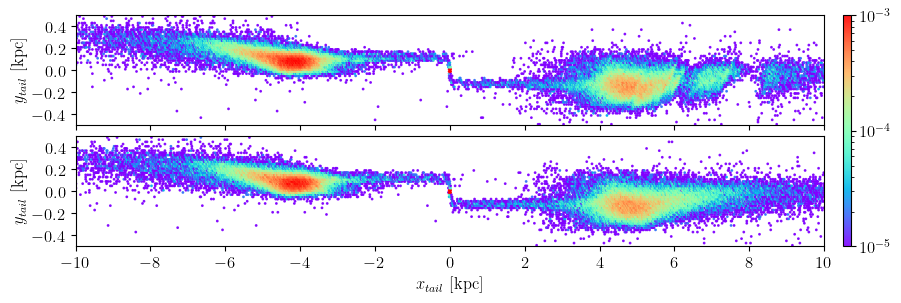

In [149]:
# fig,axis=plt.subplots(2,1,figsize=(10,2),sharex=True,sharey=True)
NROWS=2
fig,axis,cbar=set_up_plot(2)
im=axis[1].scatter(XX_V,YY_V,c=H_V,**normalScatterProperties)
axis[0].scatter(XX_F,YY_F,c=H_F,**normalScatterProperties)
cbar=plt.colorbar(im,cax=cbar)
for i in range(NROWS):
    axis[i].set(**AXIS)
    if i!=NROWS-1:
        print(i)
        axis[i].set_xticklabels([])
        axis[i].set_xlabel("")
        # axis[0][i].set("x [kpc]")
